In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import torch

# BRATS dataset

In [ ]:
t1fname = '/media/student1/NewVolume/MR_Reconstruction/EEML/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t1.nii'
t2fname = '/media/student1/NewVolume/MR_Reconstruction/EEML/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t2.nii'
flfname = '/media/student1/NewVolume/MR_Reconstruction/EEML/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_flair.nii'
segfname = '/media/student1/NewVolume/MR_Reconstruction/EEML/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_seg.nii'
img_t1 = nib.load(t1fname).get_fdata()
img_t2 = nib.load(t2fname).get_fdata()
img_fl = nib.load(flfname).get_fdata()
img_seg = nib.load(segfname).get_fdata()
img_t1.shape , img_t2.shape , img_fl.shape , img_seg.shape

In [ ]:
index = 80
plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
plt.imshow(img_t1[:,:,index],cmap='gray')
# plt.colorbar()
plt.subplot(1,4,2)
plt.imshow(img_t2[:,:,index],cmap='gray')
# plt.colorbar()
plt.subplot(1,4,3)
plt.imshow(img_fl[:,:,index],cmap='gray')
plt.subplot(1,4,4)
plt.imshow(img_seg[:,:,index],cmap='gray')

In [ ]:
# stacking and saving 
# save it in Input/Images folder

t1t2fl = np.stack((img_t1[:,:,index]/img_t1[:,:,index].max(),img_t2[:,:,index]/img_t2[:,:,index].max(),img_fl[:,:,index]/img_fl[:,:,index].max()),axis=0)
print(t1t2fl.shape)
np.save("/media/student1/NewVolume/MR_Reconstruction/MediSinGAN/SinGAN_pytorch/Input/Images/t1t2fl.npy",t1t2fl)

In [ ]:
# results of random_samples.py
img = np.load("/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Output/RandomSamples/t1t2/gen_start_scale=0/5.npy")
img.shape


In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
plt.imshow(img_t1[:,:,index],cmap='gray')
plt.title('t1_actual')
plt.subplot(1,4,2)
plt.imshow(img[0,0,:,:],cmap='gray')
plt.title('t1_generated')
plt.subplot(1,4,3)
plt.imshow(img_t2[:,:,index],cmap='gray')
plt.title('t2_actual')
plt.subplot(1,4,4)
plt.imshow(img[0,1,:,:],cmap='gray')
plt.title('t2_generated')

# Saving as .png

### Input

In [ ]:
img = np.load("/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Input/Images/t1t2fl.npy")
print(img0.shape)
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img[0,:,:],cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img[1,:,:],cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img[2,:,:],cmap='gray')

In [ ]:
plt.imsave("/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Synthetic/t1.png",img[0,:,:],cmap='gray')
plt.imsave("/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Synthetic/t2.png",img[1,:,:],cmap='gray')
plt.imsave("/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Synthetic/fl.png",img[2,:,:],cmap='gray')

### Output 

In [ ]:
path = '/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Output/RandomSamples/t1t2fl/gen_start_scale=0/'
img0 = np.load(path+'0.npy')
print(img0.shape)
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img0[0,0,:,:],cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img0[0,1,:,:],cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img0[0,2,:,:],cmap='gray')

In [ ]:
import os
scale = 9
modality = "FL"
from tqdm import tqdm
for i in tqdm(range(50)):
    path = '/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Output/RandomSamples/t1t2fl/gen_start_scale='+str(scale)+'/'
    img = np.load(path+str(i)+'.npy')
    folder = "/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Synthetic/scale_"+str(scale)+"/"+modality
    if not os.path.exists(folder):
        os.mkdir(folder)
    if modality=='T1':
        plt.imsave(folder+"/"+str(i)+".png",img[0,0,:,:],cmap='gray')
    elif modality=='T2':
        plt.imsave(folder+"/"+str(i)+".png",img[0,1,:,:],cmap='gray')
    elif modality=='FL':
        plt.imsave(folder+"/"+str(i)+".png",img[0,2,:,:],cmap='gray')
    
    

## Displaying images generated with different scales

In [ ]:
from IPython.display import Image, display

listOfImageNames = ['/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Output/RandomSamples/t1/gen_start_scale=0/10.png',
                    '/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Output/RandomSamples/t1/gen_start_scale=0/20.png',
                   '/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Output/RandomSamples/t1/gen_start_scale=0/30.png',
                   '/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Output/RandomSamples/t1/gen_start_scale=0/40.png',
                   '/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Output/RandomSamples/t1/gen_start_scale=0/49.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

In [ ]:
plt.imsave('/media/student1/NewVolume/MR_Reconstruction/EEMLproject/SinGAN/t1t2.png', t1t2,cmap='gray')

# Histopathology dataset

In [86]:
import os
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import torch
import cv2
from PIL import Image
import matplotlib
from tqdm import tqdm
from pathlib import Path
import imageio

In [2]:
image = np.load("/media/student1/NewVolume/MR_Reconstruction/EEML/Fold 1/images/fold1/images.npy")
image.shape

(2656, 256, 256, 3)

In [3]:
type = np.load("/media/student1/NewVolume/MR_Reconstruction/EEML/Fold 1/images/fold1/types.npy")
type.shape

(2656,)

In [4]:
mask = np.load("/media/student1/NewVolume/MR_Reconstruction/EEML/Fold 1/masks/fold1/masks.npy")
mask.shape

(2656, 256, 256, 6)

Adrenal_gland


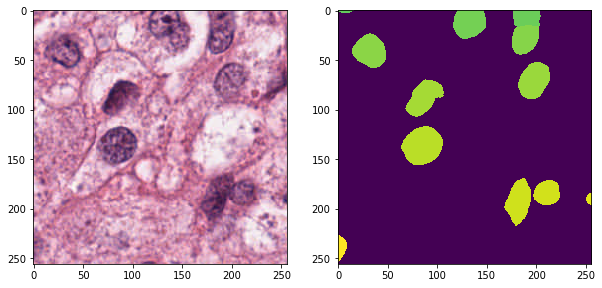

In [19]:
index = 1200
print(type[index])
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(image[index]/image[index].max())
plt.subplot(1,2,2)
plt.imshow(mask[index,:,:,0])
# plt.subplot(1,7,3)
# plt.imshow(mask[index,:,:,1])
# plt.subplot(1,7,4)
# plt.imshow(mask[index,:,:,2])
# plt.subplot(1,7,5)
# plt.imshow(mask[index,:,:,3])
# plt.subplot(1,7,6)
# plt.imshow(mask[index,:,:,4])
# plt.subplot(1,7,7)
# plt.imshow(mask[index,:,:,5])
                              

In [20]:
img1 = image[index,:,:,0]/image[index,:,:,0].max()
img2 = image[index,:,:,1]/image[index,:,:,1].max()
img3 = image[index,:,:,2]/image[index,:,:,2].max()
img4 = mask[index,:,:,0]/mask[index,:,:,0].max()
nuc_neo = np.stack((img1,img2,img3,img4),axis=0)
print(nuc_neo.shape)
np.save("/media/student1/NewVolume/MR_Reconstruction/MediSinGAN/SinGAN_pytorch/Input/Images/nuc_neo.npy",nuc_neo)

(4, 256, 256)


### Generated images

In [66]:
file = np.load("/media/student1/NewVolume/MR_Reconstruction/MediSinGAN/SinGAN_pytorch/Output/RandomSamples/nuc_neo/gen_start_scale=0/30.npy")
file.shape

(1, 4, 250, 250)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(250, 250, 3)


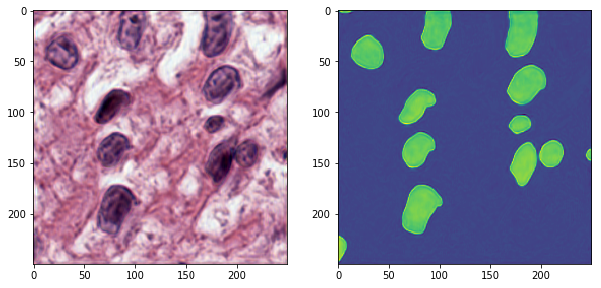

In [67]:
img = file[0,0:3,:,:]
img = img.transpose(1,2,0)
print(img.shape)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(file[0,3,:,:])

### saving genertaed images as .png

In [70]:
path = "/media/student1/NewVolume/MR_Reconstruction/MediSinGAN/SinGAN_pytorch/Output/RandomSamples/nuc_neo/gen_start_scale=0/"
path_output = '/media/student1/RemovableVolume/EEML/Histopathology/'
image_out = path_output+'images/'
mask_out = path_output+'masks/'

for i in tqdm(range(50)):
    file = path + str(i) + '.npy'
    output = np.load(file)
    image = output[0,0:3,:,:]
    image = image.transpose(1,2,0)

    image_out_file = image_out + str(i) + '.png'
    matplotlib.image.imsave(image_out_file, image)
    
    mask = output[0,3,:,:]
    mask_out_file = mask_out + str(i) + '.png'
    matplotlib.image.imsave(mask_out_file, mask)

  0%|          | 0/50 [00:00<?, ?it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  4%|▍         | 2/50 [00:00<00:10,  4.69it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  8%|▊         | 4/50 [00:00<00:07,  5.97it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
 12%|█▏        | 6/50 [00:00<00:06,  7.17it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with

In [82]:
## Combining images with their respective masks

path = '/media/student1/RemovableVolume/EEML/Histopathology/'
image_path = path + 'images/'
mask_path = path + 'masks/'
path_output = '/media/student1/RemovableVolume/EEML/Histopathology/combo/'
for i in tqdm(range(50)):
    img1 = image_path + str(i) +'.png'
    img2 = mask_path + str(i) +'.png'
    
    images = [Image.open(x) for x in [img1,img2]]
    widths, heights = zip(*(i.size for i in images))

    total_width = sum(widths)
    max_height = max(heights)

    new_im = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for im in images:
      new_im.paste(im, (x_offset,0))
      x_offset += im.size[0]
    img_out_file = path_output + str(i) + '.png'
    new_im.save(img_out_file)

100%|██████████| 50/50 [00:02<00:00, 20.97it/s]


### saving generated images as gifs

In [87]:
path = '/media/student1/RemovableVolume/EEML/Histopathology/combo/'
image_path = Path(path)
images = list(image_path.glob('*.png'))
image_list = []
for file_name in images:
    image_list.append(imageio.imread(file_name))
print(len(image_list))

50


In [113]:
path = '/media/student1/RemovableVolume/EEML/Histopathology/'
imageio.mimwrite(path + 'animated_images.gif', image_list,loop=1,fps = 5)